Capstone Project
=========

Airbnb New User Bookings
---------------------------

O objetivo desse notebook é prever qual o país de destino de um usuário da plataforma Airbnb, baseado em seus dados demográficos, registros de sessão da Web e algumas estatísticas de resumo. Todos os usuários desse conjunto de dados são dos EUA e podem ter 12 possíveis destinos: 'EUA', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL', 'DE', 'AU', 'NDF' e 'outro', sendo 'NDF' nenhum destino encontrado.

In [1]:
#Importando bibliotecas necessárias

import sklearn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import preprocessing


Leitura de arquivos importantes para a execução do projeto, como o arquivo de treino e teste dos algoritmos, o arquivo que contém estatísticas sobre os dados dos usuários do Airbnb e o arquivos com dados sobre as sessões de cada usuário. 

In [2]:
#Leitura dos arquivos 

data = pd.read_csv('train_users_2.csv')

data_test = pd.read_csv('test_users.csv')

age_gender_bkts = pd.read_csv('age_gender_bkts.csv')

sessions = pd.read_csv('sessions.csv')

   A limpeza dos dados nesse conjunto consiste na substituição dos dados desconhecidos e dos dados incosistentes, como, por exemplo, valores de idade muito alto ou muito baixo. 

In [3]:
#Limpeza e formatação dos dados
data.replace("-unknown-", np.nan, inplace=True)

#Retirando pessoas com idades que provavelmente foram erros
data.loc[data.age > 95, 'age'] = np.nan
data.loc[data.age < 13, 'age'] = np.nan


### Visualização dos dados e Análise Exploratória

Esse gráfico mostra a quantidade de homens e mulheres presentes no conjunto de dados. É possível perceber a quantidade de pessoas que não se sabe o gênero.

In [4]:
data.gender.value_counts(dropna=False).plot(kind='bar')

Esse gráfico mostra a quantidade de vezes que cada país foi escolhido como destino pelos os usuários.

In [5]:
destination = data.country_destination.value_counts(dropna=False)
destination.plot(kind='bar')

In [6]:
age_gender_bkts.head(10)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


Preenchendo os valores não numéricosnos conjuntos de dados para verificar estatísticas e aplicar os algoritmos.

In [7]:
sessions.fillna(0, inplace=True)
data.fillna(0, inplace=True)

In [8]:
data.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,213451.000000,213451.000000
mean,2.013085e+13,21.034415,3.267387
std,9.253717e+09,20.067845,7.637707
min,2.009032e+13,0.000000,0.000000
25%,2.012123e+13,0.000000,0.000000
50%,2.013091e+13,26.000000,0.000000
75%,2.014031e+13,35.000000,0.000000
max,2.014063e+13,95.000000,25.000000


In [9]:
sessions.describe()

,secs_elapsed
count,1.056774e+07
mean,1.915601e+04
std,8.833741e+04
min,0.000000e+00
25%,2.080000e+02
50%,1.108000e+03
75%,8.193000e+03
max,1.799977e+06


In [10]:
age_gender_bkts.describe()

,population_in_thousands,year
count,420.000000,420.0
mean,1743.133333,2015.0
std,2509.843202,0.0
min,0.000000,2015.0
25%,396.500000,2015.0
50%,1090.500000,2015.0
75%,1968.000000,2015.0
max,11601.000000,2015.0


### Modelo

Como esse é um problema que envolve mais de uma classe, foram escolhidos alguns dos algoritmos multiclasse disponíveis na biblioteca sklearn para avaliarmos qual delas obtém o melhor resultado na classificação do nosso conjunto de dados.

In [11]:
#Importando modelos multiclasses

from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 

Após remover as labels do conjunto de treino, cada categoria contida nas colunas foi transformada em valores numéricos para que os algoritmos pudessem ser utilizados.

In [12]:
y_train = data['country_destination']
X_train = data.drop(data.columns[15], axis=1) 

X_test = data_test

le = preprocessing.LabelEncoder()
X_train_numeric = X_train.apply(le.fit_transform)
X_test_numeric = X_test.apply(le.fit_transform)

In [13]:
gnb = GaussianNB()
gnb.fit(X_train_numeric, y_train)
gnb.score(X_train_numeric, y_train)

0.8731137357051502

In [14]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_numeric, y_train)
dtc.score(X_train_numeric, y_train)

1.0

In [15]:
bnb = BernoulliNB()
bnb.fit(X_train_numeric, y_train)
bnb.score(X_train_numeric, y_train)

0.8756998093239198

In [16]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_numeric, y_train)
neigh.score(X_train_numeric, y_train)

0.8840295899293046

In [17]:
lr = LogisticRegression()
lr.fit(X_train_numeric, y_train)
lr.score(X_train_numeric, y_train)

0.8756342205002553

### Predições

O score foi utilizado para escolher o algoritmo para ser utilizado nas predições no conjunto de teste. O algoritmo que apresentou a melhor pontuação(score) foi o DecisionTreeClassifier.  

In [18]:
y_pred = dtc.predict(X_test_numeric)

O gráfico mostra a frequência que cada país aparece nas predições do algoritmo utilizado, sendo a maior parte do resultado outros países. Em seguida, aparece Estados Unidos, Austrália e Espanha.

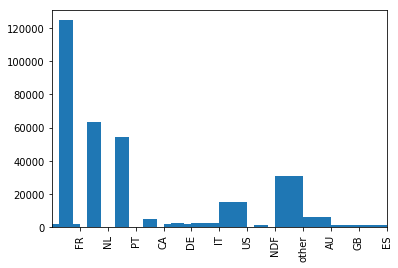

In [19]:
from collections import Counter

labels, values = zip(*Counter(y_pred).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [20]:
def dcg_at_k(r, k, method=0):
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.

def ndcg_score(r, k, method=0):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

#Retirado de https://gist.github.com/bwhite/3726239

O normalized discounted cumulative gain - ndcg - foi utilizado para análise no kaggle, sendo de 0.88697 no primeiro lugar.

In [21]:
ndcg_score(le.fit_transform(y_pred), k=2)

0.8181818181818182

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV 
from sklearn.cross_validation import ShuffleSplit
from sklearn.preprocessing import label_binarize
    
# Gerar conjuntos de validação-cruzada para o treinamento de dados
# sklearn versão 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
# sklearn versão 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

# TODO: Gerar uma árvore de decisão de regressão de objeto
regressor = DecisionTreeRegressor()

# TODO: Gerar um dicionário para o parâmetro 
params = {'max_depth': range(1, 11)}

# TODO: Gerar o objeto de busca em matriz
grid = GridSearchCV(estimator=regressor, param_grid=params,cv=cv_sets, scoring = None)
# Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
y = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
grid = grid.fit(X_train_numeric, y)

# Devolver o modelo ótimo depois de realizar o ajuste dos dados
print grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
